In [1]:
from utils import split_data
import numpy as np

PATH = "./data/"
splitter = split_data(PATH + "raw.csv", PATH, test_size=0.1,
                          train_size=0.9)
x_train, y_train, x_test, y_test = splitter.split()

/home/markus/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from utils import translate

translater = translate()
x_train = translater.translate(x_train)
x_test = translater.translate(x_test)

In [3]:
from utils import standardize

y_train_std, y_test_std = standardize(y_train, y_test)

In [4]:
from modelArchitecture.ResnetRnnDense import ResnetRnnDense

In [5]:
from HydraMethod import HydraMethod

In [6]:
from keras.losses import mean_squared_error
#one_head_hydra = HydraMethod(ResnetRnnDense(), 1);one_head_hydra.compile(loss=mean_squared_error)
one_head_hydra = HydraMethod(ResnetRnnDense(), 1);one_head_hydra.compile()

In [7]:
from utils import LRFinder

In [8]:
from utils import result
def T95(model, x, y):
    predict_train = model.predict(x)
    res_train = result(y, predict_train)
    print(np.round(res_train.t95()[0], 4))

In [9]:
lr_finder = LRFinder(one_head_hydra.get_model())
lr_finder.find(one_head_hydra.get_all_representation(x_train), 
               y_train_std, 0.000001, 1, 256, 3,fit=True)

KeyboardInterrupt: 

In [ ]:
lr_finder.plot_loss()

In [ ]:
one_head_hydra.compile(learning_rate=1e-3)
trained_one_head_hydra = one_head_hydra.fit(x_train, y_train_std, x_test, y_test_std, batch_size=256)

In [ ]:
T95(trained_one_head_hydra, one_head_hydra.get_all_representation(x_test), y_test_std)

In [ ]:
#two_head_hydra = HydraMethod(ResnetRnnDense(), 2);two_head_hydra.compile(loss=mean_squared_error)
two_head_hydra = HydraMethod(ResnetRnnDense(), 2);two_head_hydra.compile()

In [ ]:
lr_finder = LRFinder(two_head_hydra.get_model())
lr_finder.find(two_head_hydra.get_all_representation(x_train), 
               y_train_std, 0.000001, 1, 256, 3,fit=True)

In [ ]:
lr_finder.plot_loss()

In [ ]:
two_head_hydra.compile(learning_rate=1e-3)
trained_two_head_hydra = two_head_hydra.fit(x_train, y_train_std, x_test, y_test_std, batch_size=256)

In [ ]:
T95(trained_two_head_hydra, two_head_hydra.get_all_representation(x_test), y_test_std)

In [ ]:
#three_head_hydra = HydraMethod(ResnetRnnDense(), 3);three_head_hydra.compile(loss=mean_squared_error)
three_head_hydra = HydraMethod(ResnetRnnDense(), 3);three_head_hydra.compile()

In [ ]:
lr_finder = LRFinder(three_head_hydra.get_model())
lr_finder.find(three_head_hydra.get_all_representation(x_train), 
               y_train_std, 0.000001, 1, 256, 3,fit=True)

In [ ]:
lr_finder.plot_loss()

In [ ]:
three_head_hydra.compile(learning_rate=1e-3)
trained_three_head_hydra = three_head_hydra.fit(x_train, y_train_std, x_test, y_test_std, batch_size=256)

In [ ]:
T95(trained_three_head_hydra, three_head_hydra.get_all_representation(x_test), y_test_std)

In [9]:
#four_head_hydra = HydraMethod(ResnetRnnDense(), 4);four_head_hydra.compile(loss=mean_squared_error)
four_head_hydra = HydraMethod(ResnetRnnDense(blocks=[1, 1, 1, 1], features=32,
                                   ResnetDrop=0.1, RnnDrop=0.4, DenseDrop=0.1),
                                   4);four_head_hydra.compile()

In [ ]:
lr_finder = LRFinder(four_head_hydra.get_model())
lr_finder.find(four_head_hydra.get_all_representation(x_train), 
               y_train_std, 0.000001, 1, 128, 3,fit=True)

In [ ]:
lr_finder.plot_loss()

In [12]:
#four_head_hydra = HydraMethod(ResnetRnnDense(), 4);four_head_hydra.compile(loss=mean_squared_error)
four_head_hydra = HydraMethod(ResnetRnnDense(blocks=[1, 1, 1, 1], features=32,
                                   ResnetDrop=0.1, RnnDrop=0.5, DenseDrop=0.1),4);four_head_hydra.compile()

In [14]:
lr_finder = LRFinder(four_head_hydra.get_model())
lr_finder.find(four_head_hydra.get_all_representation(x_train), 
               y_train_std, 0.000001, 1, 128, 3,fit=True)

Epoch 1/3
969951/969951 [==============================] - 456s 470us/step - loss: 0.4378
Epoch 2/3
656128/969951 [===================>..........] - ETA: 2:24 - loss: 0.1648

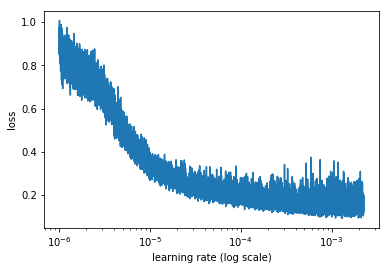

In [15]:
lr_finder.plot_loss()

In [8]:
four_head_hydra.compile(learning_rate=1e-3)
trained_four_head_hydra = four_head_hydra.fit(x_train, y_train_std, x_test, y_test_std, batch_size=256)

/home/markus/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:100: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 968667 samples, validate on 110302 samples
Epoch 1/3
968667/968667 [==============================] - 256s 264us/step - loss: 0.1534 - val_loss: 0.1015
Epoch 2/3
 64000/968667 [>.............................] - ETA: 3:43 - loss: 0.1228

KeyboardInterrupt: 

In [ ]:
lr_finder.plot_loss()

In [ ]:
T95(trained_four_head_hydra, four_head_hydra.get_all_representation(x_test), y_test_std)